In [1]:
!pip install metpy
#Comando para instalar cartopy
!wget https://anaconda.org/conda-forge/cartopy/0.16.0/download/linux-64/cartopy-0.16.0-py36h81b52dc_2.tar.bz2
!tar xvjf cartopy-0.16.0-py36h81b52dc_2.tar.bz2
!cp -r lib/python3.6/site-packages/* /usr/local/lib/python3.6/dist-packages/
!pip install shapely pyshp
!apt install libproj-dev libgeos-dev
!pip install metpy
!sudo pip3 install -U git+https://github.com/matplotlib/basemap.git
!pip install netCDF4

--2020-05-27 00:51:46--  https://anaconda.org/conda-forge/cartopy/0.16.0/download/linux-64/cartopy-0.16.0-py36h81b52dc_2.tar.bz2
Resolving anaconda.org (anaconda.org)... 104.17.93.24, 104.17.92.24, 2606:4700::6811:5c18, ...
Connecting to anaconda.org (anaconda.org)|104.17.93.24|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://binstar-cio-packages-prod.s3.amazonaws.com/56f0128969180359233aa1e4/5b8b25251abf28133f2bfda9?response-content-disposition=attachment%3B%20filename%3D%22cartopy-0.16.0-py36h81b52dc_2.tar.bz2%22%3B%20filename%2A%3DUTF-8%27%27cartopy-0.16.0-py36h81b52dc_2.tar.bz2&response-content-type=application%2Fx-tar&X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Expires=60&X-Amz-Date=20200527T005146Z&X-Amz-SignedHeaders=host&X-Amz-Security-Token=IQoJb3JpZ2luX2VjEFcaCXVzLWVhc3QtMSJHMEUCIGihV9wppjWSejvya5WQU6pLzC8AF3G0yXp3u%2FdYSOsnAiEA7cmaZ%2BDqTzSbQo%2Bh8rUebilwRODsnnHW3Mjk%2FoNfN2wqvQMIsP%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FARAAGgw0NTU4NjQwOTgzNzgiDDZyV1k

In [0]:
import pandas as pd
from metpy.interpolate import (interpolate_to_grid, remove_nan_observations,remove_repeat_coordinates)
from mpl_toolkits.basemap import Basemap 
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import linalg, optimize
import numpy as np
from matplotlib.colors import BoundaryNorm
from scipy.interpolate import griddata  
import numpy.ma as ma

In [12]:
!wget https://github.com/vlsantos-bit/Exemplos_radar_livro-3.Interpolation/archive/master.zip

--2020-05-27 00:54:34--  https://github.com/vlsantos-bit/Exemplos_radar_livro-3.Interpolation/archive/master.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/vlsantos-bit/Exemplos_radar_livro-3.Interpolation/zip/master [following]
--2020-05-27 00:54:34--  https://codeload.github.com/vlsantos-bit/Exemplos_radar_livro-3.Interpolation/zip/master
Resolving codeload.github.com (codeload.github.com)... 140.82.114.9
Connecting to codeload.github.com (codeload.github.com)|140.82.114.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip.3’

master.zip.3            [    <=>             ]   2.10M  1.68MB/s    in 1.2s    

2020-05-27 00:54:37 (1.68 MB/s) - ‘master.zip.3’ saved [2205217]



In [13]:
!unzip master.zip

Archive:  master.zip.3
a5455f11fb5340490eefcc512446ff34b95416cb
replace Exemplos_radar_livro-3.Interpolation-master/SC_2020_2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Exemplos_radar_livro-3.Interpolation-master/SC_2020_2.csv  
  inflating: Exemplos_radar_livro-3.Interpolation-master/SC_2020_4.csv  
  inflating: Exemplos_radar_livro-3.Interpolation-master/data.csv  


In [0]:
# Abrindo o dado e definindo suas colunas 

Filename= "Exemplos_radar_livro-3.Interpolation-master/data.csv"
colnames = ['municiom','code','UF','Nome','lon','lat','tempo','preci','']

In [15]:
# Realizando a leitura com a biblioteca Pandas

dado=pd.read_csv(Filename, sep=';', names=colnames)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
#Transformando os dados para lista

tempo=dado.tempo.tolist()
la=dado.lat.tolist()
lo=dado.lon.tolist()
pre=dado.preci.tolist()

In [0]:
#Escolhendo a data e hora da interpolação

data= '2020-04-29 05:00:00.0'


In [0]:
#Loop para a leitura dos dados e criação das novas listas
lat=[]
lon=[]
preci=[]
for i in range(0,len(tempo)):
    if tempo[i]==data:
        lat.append(la[i])
        lon.append(lo[i])
        preci.append(pre[i])

In [0]:


levels = np.arange(0, 10, 0.5) #np.arange = Serve para ler o código de linha em linha
cmap = plt.get_cmap('magma')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
x=lon
y=lat

In [0]:
#Usando a função remove_repeat_coordinates para excluir latitudes e longitudes repitidas

x, y, preci = remove_repeat_coordinates(x, y, preci)

In [0]:
#Transformando os valores de em reais

p = np.array(preci).astype(np.float)
la = np.array(y).astype(np.float)
lo = np.array(x).astype(np.float)

In [72]:
#visaulizando o Dado

p

array([0.4, 2.2, 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 2. , 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 1. , 0. , 0. , 0. , 0. ])

In [0]:

from scipy import interpolate


In [0]:
#Definindo método de interpolação

metodo_interp = 'rbf'
gx, gy, im = interpolate_to_grid(lo, la, p, interp_type= metodo_interp, minimum_neighbors=2, search_radius=20, hres=0.01)
im = ma.masked_where(im<0.2,im) 

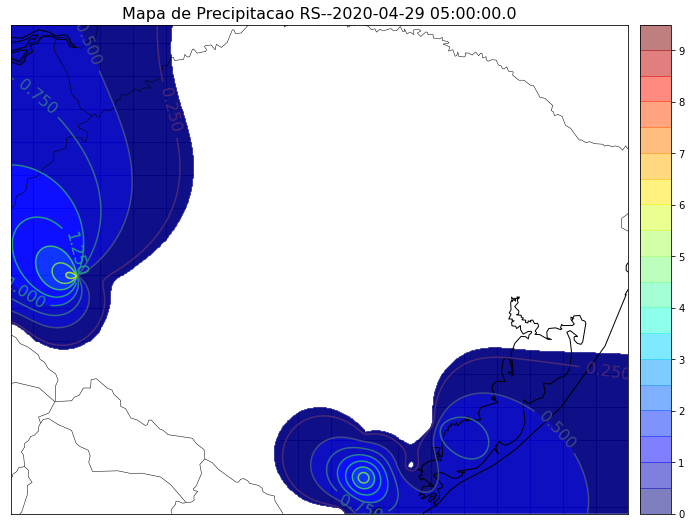

In [77]:
#Plotando a imagem 


fig = plt.figure(figsize=(12,9))
map = Basemap(llcrnrlon=np.min(gx),llcrnrlat=np.min(gy),urcrnrlon=np.max(gx),urcrnrlat=np.max(gy),resolution='i')
map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.pcolormesh(gx,gy,im,norm=norm,cmap='jet',alpha=0.5)
map.colorbar(shrink=.62)


plt.title("Mapa de Precipitacao RS--" + data, fontsize=16)
plt.savefig('chuva_' + metodo_interp + '.png', dpi=300)
cs1 = plt.contour(gx,gy,im)
plt.clabel(cs1, inline=4, fontsize=16,)
plt.show()



In [0]:
#Interpolação Mensal SC


Filename= "Exemplos_radar_livro-3.Interpolation-master/SC_2020_2.csv"
colnames = ['municiom','code','UF','Nome','lon','lat','tempo','preci','']


In [82]:
dado=pd.read_csv(Filename, sep=';', names=colnames)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [83]:
# Usando a função groupby para agrupar as mesmas latitude e longitudes e somar os valores de precipitação.

nd = pd.DataFrame(dado, columns=['lon', 'lat', 'preci']).groupby(['lon','lat'])['preci'].sum().reset_index()
#nd
#Removendo os valores baixos 

p = nd.loc[0:255]
p

,lon,lat,preci
0,-53.711,-27.1726,84.8
1,-53.6375,-26.2622,0.6
2,-53.5258,-26.738,104.2
3,-53.5075,-26.4516,77.2
4,-53.3951,-27.103,84.6
...,...,...,...
251,-48.51,-27.754,184.87
252,-48.5011,-26.2219,321.2
253,-48.5,-27.706,163.95
254,-48.458,-27.432,148.92


In [0]:
la=p.lat.tolist()
lo=p.lon.tolist()
pre=p.preci.tolist()

In [0]:
lat=[]
lon=[]
preci=[]
for i in range(len(pre)):
        lat.append(la[i])
        lon.append(lo[i])
        preci.append(pre[i])

In [0]:
x, y, preci = remove_repeat_coordinates(lat, lon, preci)

In [0]:
levels = np.arange(0, 250, 1) #np.arange = Serve para ler o código de linha em linha
cmap = plt.get_cmap('magma')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
x=lon
y=lat

In [91]:
metodo_interp = 'natural_neighbor'
gx, gy, im = interpolate_to_grid(x, y, preci, interp_type= metodo_interp, minimum_neighbors=2, search_radius=20, hres=0.01)
im = ma.masked_where(im<0.2,im) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


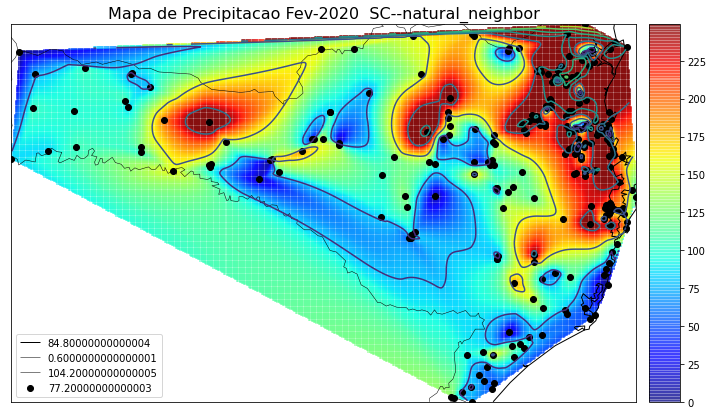

In [92]:
fig = plt.figure(figsize=(12,9))
map = Basemap(llcrnrlon=np.min(gx),llcrnrlat=np.min(gy),urcrnrlon=np.max(gx),urcrnrlat=np.max(gy),resolution='i')
#Add Linhas geográficas
map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.pcolormesh(gx,gy,im,norm=norm,cmap='jet',alpha=0.5)
map.colorbar(shrink=.62)

plt.title("Mapa de Precipitacao Fev-2020  SC--" + metodo_interp, fontsize=16)
plt.savefig('chuva_' + metodo_interp + '.png', dpi=300)
plt.scatter(x,y,color='black')
cs1 = plt.contour(gx,gy,im)
#Inserindo legenda
plt.legend(preci, fontsize=10)

plt.show()


In [94]:
#Mensal RS


Filename= "Exemplos_radar_livro-3.Interpolation-master/data.csv"
colnames = ['municiom','code','UF','Nome','lon','lat','tempo','preci','']
dado=pd.read_csv(Filename, sep=';', names=colnames)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [95]:
nd = pd.DataFrame(dado, columns=['lon', 'lat', 'preci']).groupby(['lon','lat'])['preci'].sum().reset_index()
p = nd.loc[0:70]
p

,lon,lat,preci
0,-57.107,-29.7805,45.6
1,-57.0956,-29.7531,40.2
2,-56.8481,-29.5123,51.8
3,-56.4652,-30.3718,42.6
4,-56.042,-28.632,39
...,...,...,...
66,-50.775,-29.515,29.3
67,-50.662,-29.6689,7.4
68,-50.4596,-29.6407,41
69,-50.063,-29.538,61.43


In [0]:
la=p.lat.tolist()
lo=p.lon.tolist()
pre=p.preci.tolist()

In [0]:
lat=[]
lon=[]
preci=[]
for i in range(len(pre)):
        lat.append(la[i])
        lon.append(lo[i])
        preci.append(pre[i])

In [0]:
x, y, preci = remove_repeat_coordinates(lat, lon, preci)

In [0]:
levels = np.arange(0, 250, 1) #np.arange = Serve para ler o código de linha em linha
cmap = plt.get_cmap('magma')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
x=lon
y=lat

In [0]:
metodo_interp = 'barnes'
gx, gy, im = interpolate_to_grid(x, y, preci, interp_type= metodo_interp, minimum_neighbors=2, search_radius=20, hres=0.01)
im = ma.masked_where(im<0.2,im) 

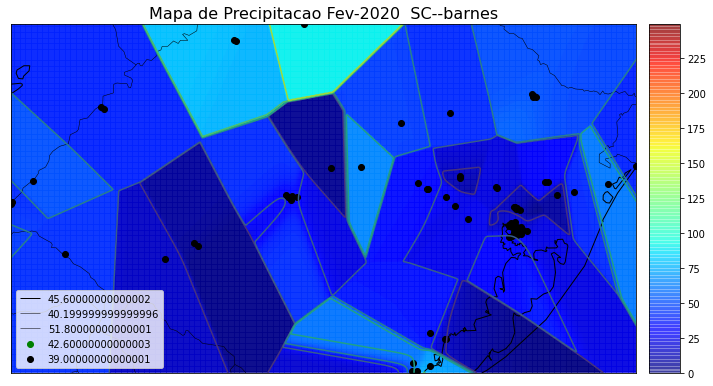

In [101]:
fig = plt.figure(figsize=(12,9))
map = Basemap(llcrnrlon=np.min(gx),llcrnrlat=np.min(gy),urcrnrlon=np.max(gx),urcrnrlat=np.max(gy),resolution='i')
#Add geographic outlines
map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.pcolormesh(gx,gy,im,norm=norm,cmap='jet',alpha=0.5)
map.colorbar(shrink=.62)
map.scatter(-49.091512,-26.883527, marker = 'o', color='g', zorder=5)
#map.scatter(x, y, preci, color='g', marker='o',zorder=0.1)

plt.title("Mapa de Precipitacao Fev-2020  SC--" + metodo_interp, fontsize=16)
plt.savefig('chuva_' + metodo_interp + '.png', dpi=300)
plt.scatter(x,y,color='black')
cs1 = plt.contour(gx,gy,im)
plt.legend(preci, fontsize=10)

plt.show()
